# Exploratory Data Analysis on Employee Attrition Data
#### By Vedant Thakur

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [2]:
df = pd.read_csv("Employee Attrition Data.csv")

In [3]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [4]:
df.shape

(74610, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

In [6]:
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

As we don't require Distance from Home column lets drop it

In [9]:
df = df.drop(columns={'Distance from Home'})

In [11]:
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

In [12]:
df = df.drop(columns={'Company Tenure (In Months)'})

In [13]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74610 non-null  int64 
 1   Age                       74610 non-null  int64 
 2   Gender                    74610 non-null  object
 3   Years at Company          74610 non-null  int64 
 4   Job Role                  74610 non-null  object
 5   Monthly Income            74610 non-null  int64 
 6   Work-Life Balance         74610 non-null  object
 7   Job Satisfaction          74610 non-null  object
 8   Performance Rating        74610 non-null  object
 9   Number of Promotions      74610 non-null  int64 
 10  Overtime                  74610 non-null  object
 11  Education Level           74610 non-null  object
 12  Marital Status            74610 non-null  object
 13  Number of Dependents      74610 non-null  int64 
 14  Job Level             

In [15]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Number of Dependents
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,1.657432
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,1.579862
min,1.000000,18.000000,1.000000,1226.000000,0.000000,0.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,0.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,1.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,3.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,15.000000


Visualisations

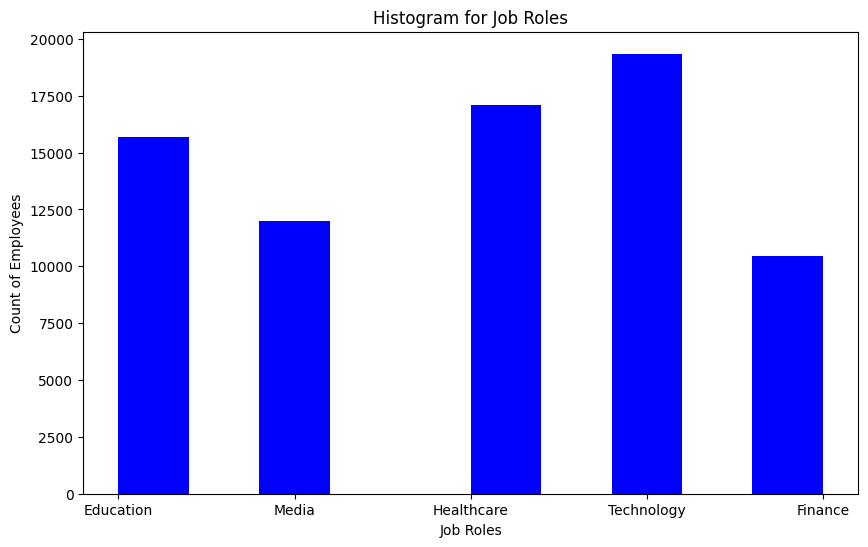

In [18]:
plt.figure(figsize=(10,6))
plt.title('Histogram for Job Roles')
plt.hist(df['Job Role'], color='blue')
plt.xlabel('Job Roles')
plt.ylabel('Count of Employees')
plt.show()

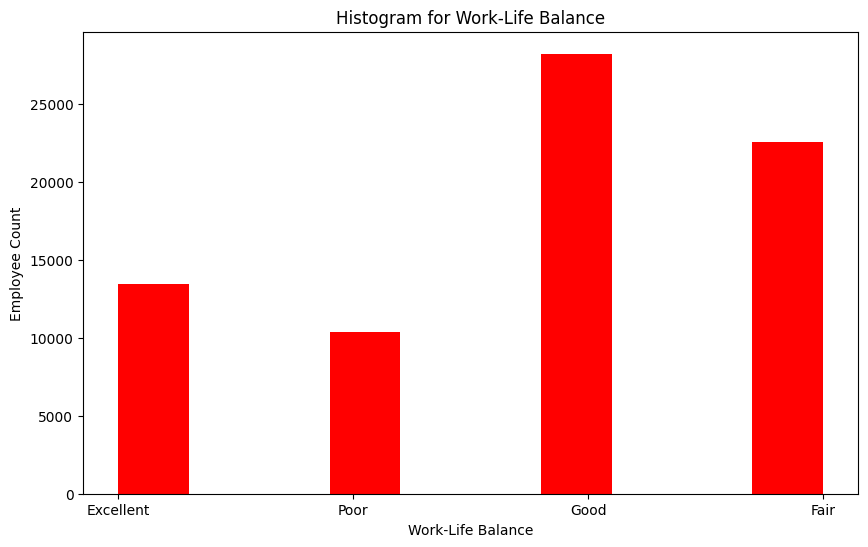

In [19]:
plt.figure(figsize=(10,6))
plt.title('Histogram for Work-Life Balance')
plt.hist(df['Work-Life Balance'], color='red')
plt.xlabel('Work-Life Balance')
plt.ylabel('Employee Count')
plt.show()

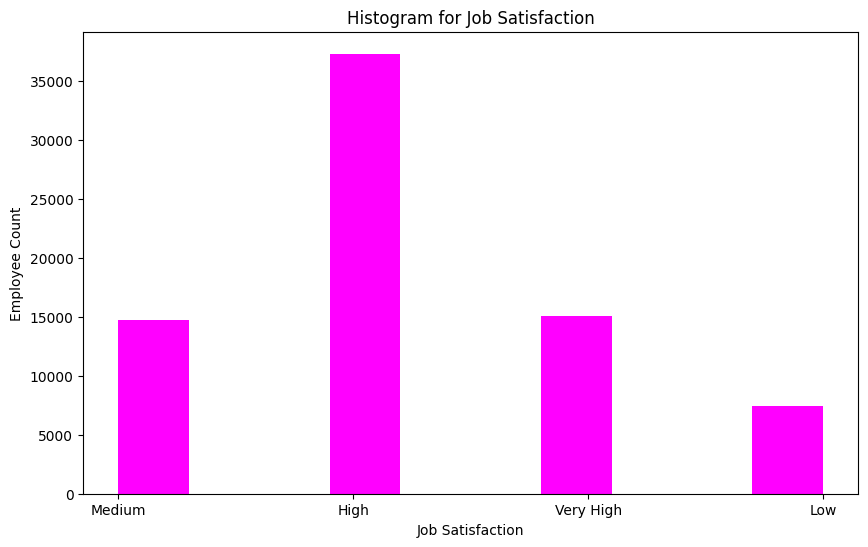

In [21]:
plt.figure(figsize=(10,6))
plt.title('Histogram for Job Satisfaction')
plt.hist(df['Job Satisfaction'], color='magenta')
plt.xlabel('Job Satisfaction')
plt.ylabel('Employee Count')
plt.show()

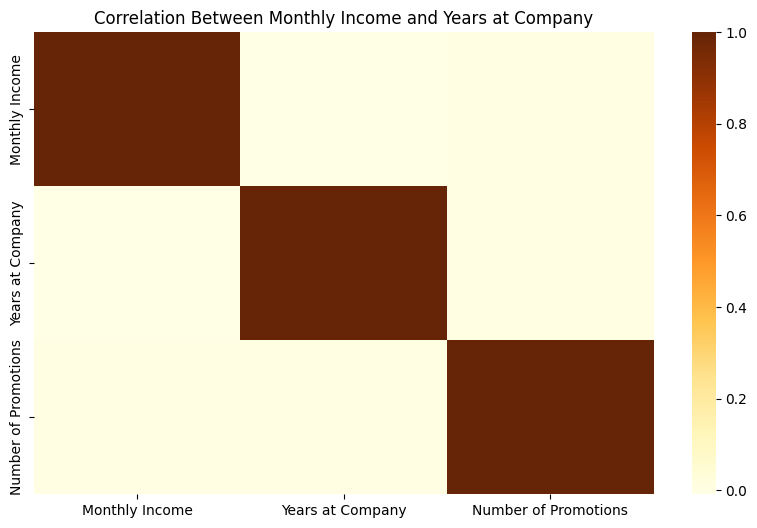

In [34]:
correlation = df[['Monthly Income','Years at Company','Number of Promotions']].corr()
plt.figure(figsize=(10,6))
plt.title('Correlation Between Monthly Income and Years at Company')
sns.heatmap(correlation, cmap='YlOrBr')
plt.show()

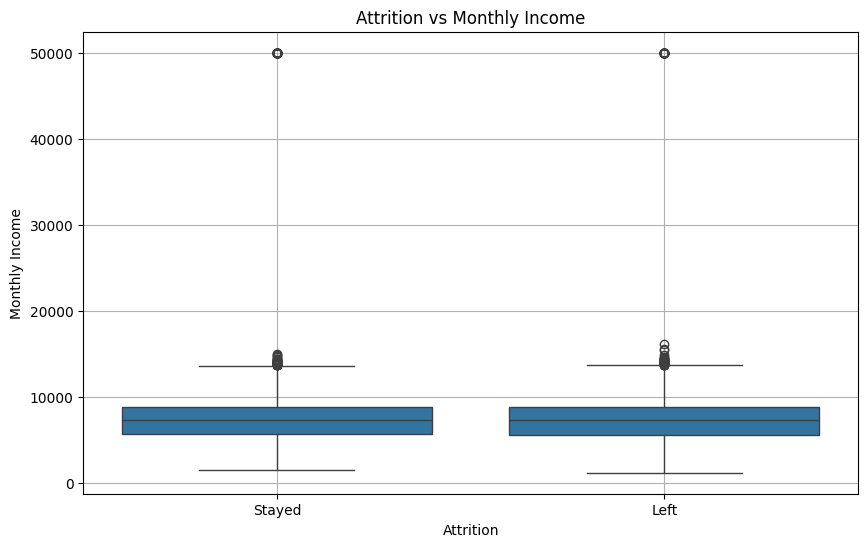

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Monthly Income', data=df)
plt.title('Attrition vs Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

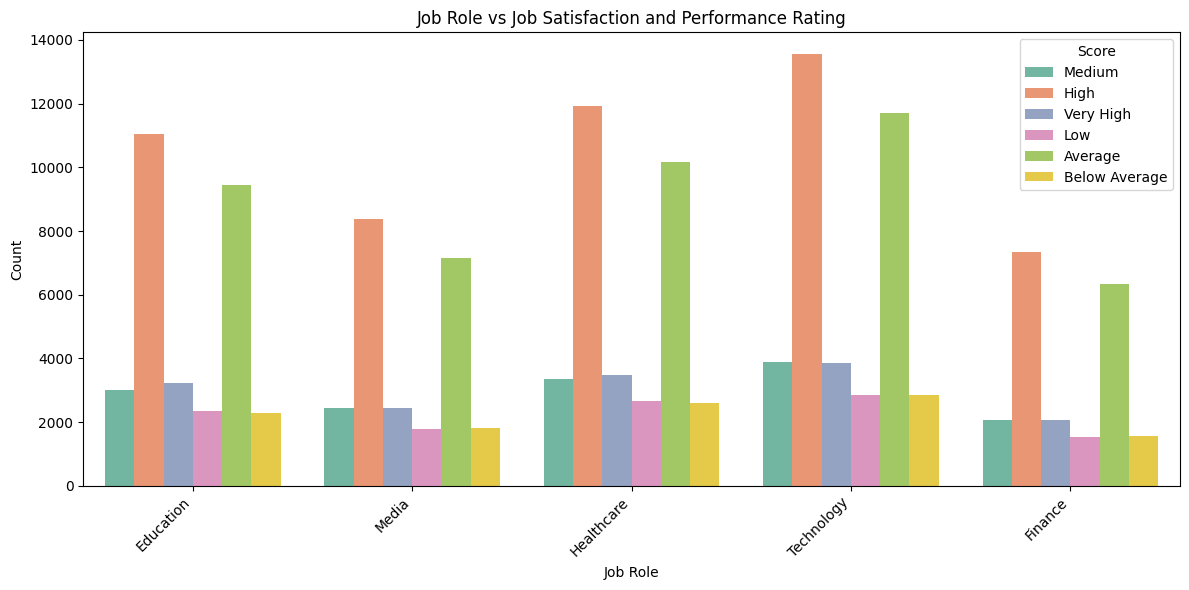

In [37]:
melted_df = df.melt(id_vars='Job Role', 
                    value_vars=['Job Satisfaction', 'Performance Rating'],
                    var_name='Metric', 
                    value_name='Score')

plt.figure(figsize=(12, 6))
sns.countplot(data=melted_df, x='Job Role', hue='Score', palette='Set2', dodge=True)
plt.title('Job Role vs Job Satisfaction and Performance Rating')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Score')
plt.tight_layout()
plt.show()

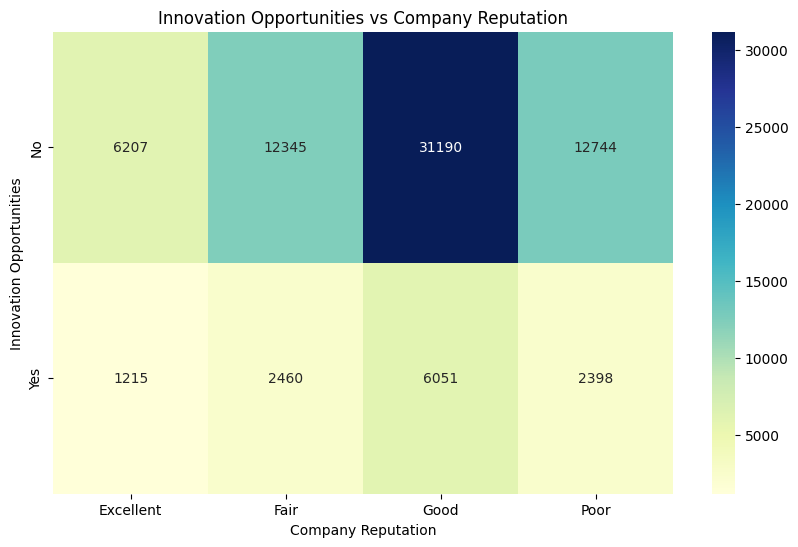

In [38]:
heatmap_data = pd.crosstab(df['Innovation Opportunities'], df['Company Reputation'])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Innovation Opportunities vs Company Reputation')
plt.xlabel('Company Reputation')
plt.ylabel('Innovation Opportunities')
plt.show()

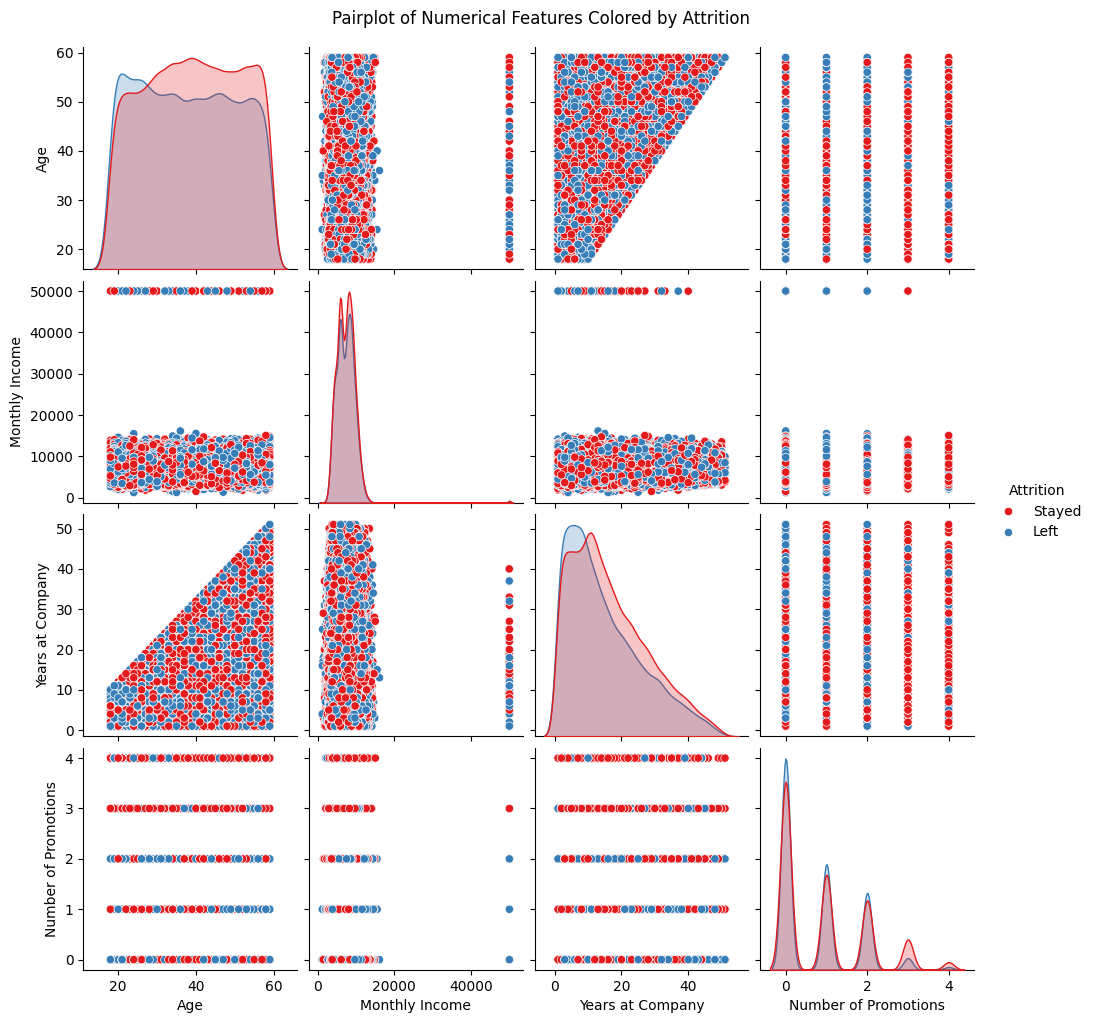

In [39]:
pairplot_df = df[['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Attrition']]
sns.pairplot(pairplot_df, hue='Attrition', palette='Set1')
plt.suptitle("Pairplot of Numerical Features Colored by Attrition", y=1.02)
plt.show()